In [2]:
import pandas as pd
from google.colab import files
import io



In [6]:
uploadedfiles = files.upload()

Saving book_sales - Sheet1.csv to book_sales - Sheet1 (1).csv


In [12]:
df = pd.read_csv(io.BytesIO(uploadedfiles['book_sales - Sheet1.csv']))

In [15]:
df.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       30 non-null     object
 1   Paperback  30 non-null     int64 
 2   Hardcover  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [14]:
df.tail()

,Date,Paperback,Hardcover
25,2000-04-26,182,200
26,2000-04-27,222,201
27,2000-04-28,217,283
28,2000-04-29,188,220
29,2000-04-30,247,259


In [17]:
df.describe()

,Paperback,Hardcover
count,30.000000,30.000000
mean,186.400000,198.833333
std,35.480543,40.301522
min,111.000000,128.000000
25%,167.250000,170.500000
50%,189.000000,200.500000
75%,207.250000,222.000000
max,247.000000,283.000000


In [19]:
df.shape    

(30, 3)

In [21]:
df_new = pd.read_csv(io.BytesIO(uploadedfiles['book_sales - Sheet1.csv']))

In [23]:
import numpy as np

In [25]:
df_new.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [35]:
df_new['Time'] = np.arange(len(df_new.index))


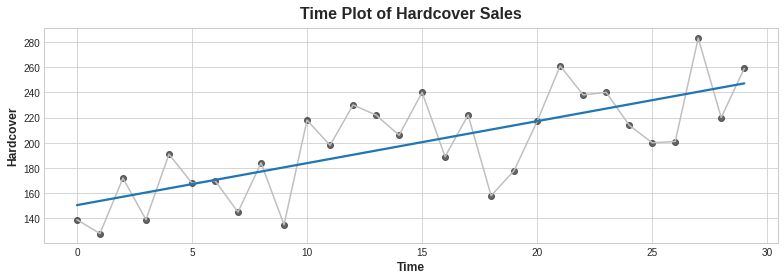

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df_new, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df_new, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [38]:
X = df_new.loc[:, ['Time']]  # features


In [31]:
y = df_new.loc[:, 'Hardcover']  # targe


In [42]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [50]:
y_pred = pd.Series(model.predict(X), index=X.index)
print(y_pred)

0     150.539785
1     153.870374
2     157.200964
3     160.531554
4     163.862143
5     167.192733
6     170.523322
7     173.853912
8     177.184501
9     180.515091
10    183.845680
11    187.176270
12    190.506859
13    193.837449
14    197.168039
15    200.498628
16    203.829218
17    207.159807
18    210.490397
19    213.820986
20    217.151576
21    220.482165
22    223.812755
23    227.143344
24    230.473934
25    233.804524
26    237.135113
27    240.465703
28    243.796292
29    247.126882
dtype: float64


In [47]:
print(metrics.r2_score(y,y_pred))


0.529298964261638


In [46]:
print(model.coef_,model.intercept_)


[3.33058954] 150.53978494623658
